<a href="https://colab.research.google.com/github/lukigu/real-estate-prediction/blob/main/random_forest_gliwice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import json
import datetime
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

from google.colab import files
#uploaded = files.upload()

In [ ]:
fed_files = ['Gliwice1.csv']

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]


In [ ]:
dfs[0]

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena
rok,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574
2010 Q2,350786.0,102.2,236,3446.68,391,191074
2010 Q3,358179.7,102.3,227,3524.17,391,193899
2010 Q4,406470.8,103.0,199,3913.18,391,207676
2011 Q1,358866.8,104.6,160,3799.45,368,190730
2011 Q2,378064.9,104.1,216,3719.88,368,188859
2011 Q3,387151.9,104.6,231,3775.52,368,186640
2011 Q4,441167.7,103.8,234,4048.62,368,204272
2012 Q1,377803.3,102.9,189,4003.08,344,200085


In [ ]:
price_data = dfs[0]

In [ ]:
price_data["adj_cena"] = price_data["srednia cena"] / price_data["inflacja"] * 100

<Axes: xlabel='rok'>

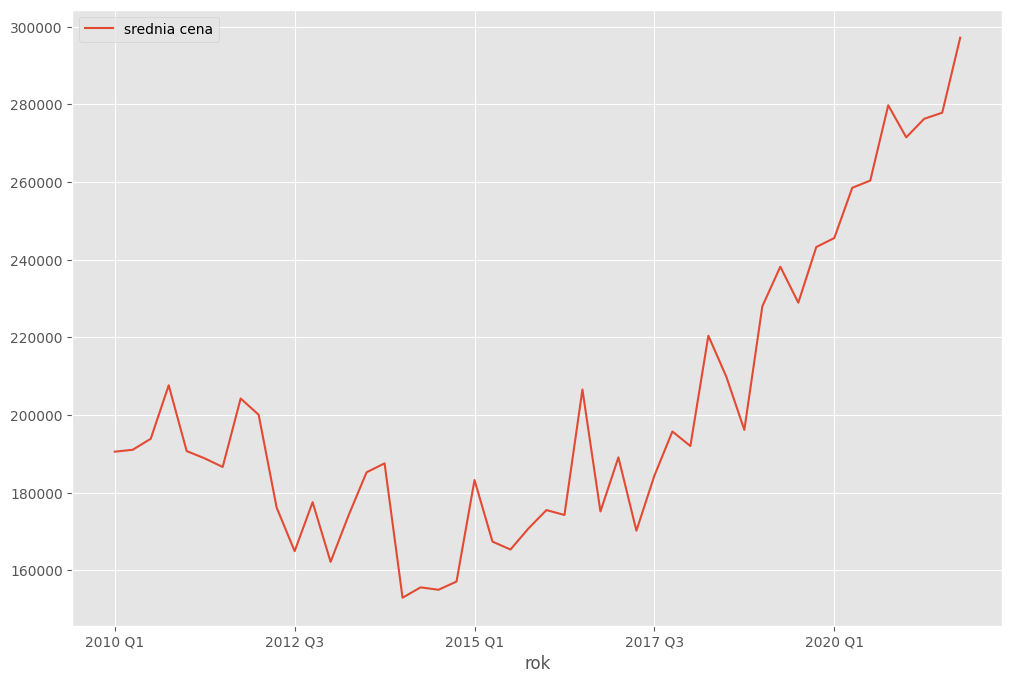

In [ ]:
price_data.plot.line(y="srednia cena", use_index=True)

<Axes: xlabel='rok'>

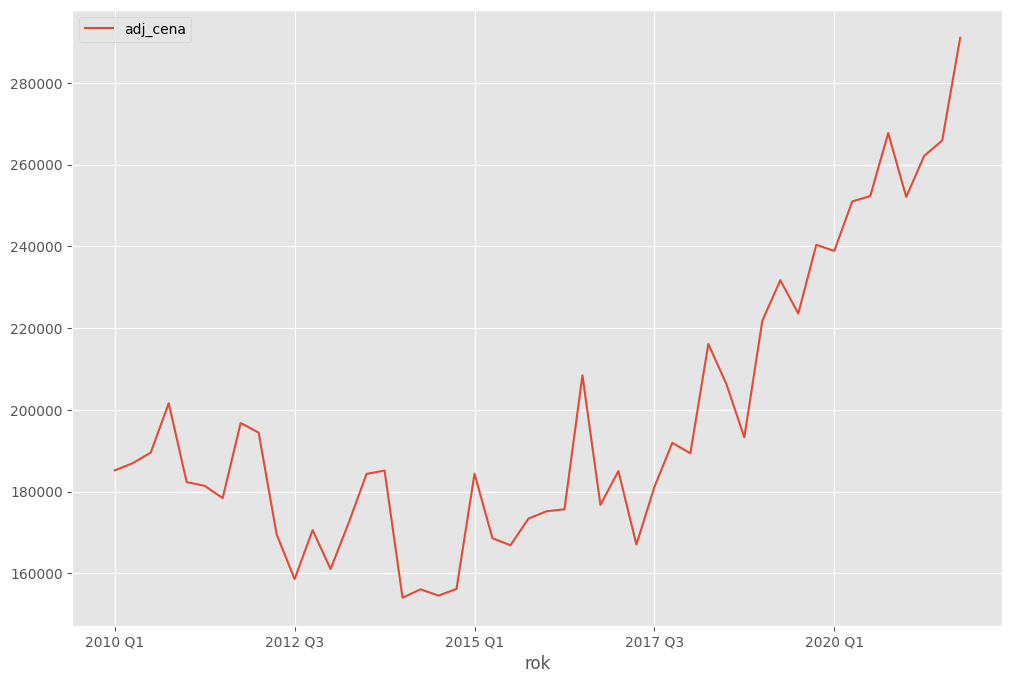

In [ ]:
price_data.plot.line(y="adj_cena", use_index=True)

<Axes: xlabel='inflacja', ylabel='Count'>

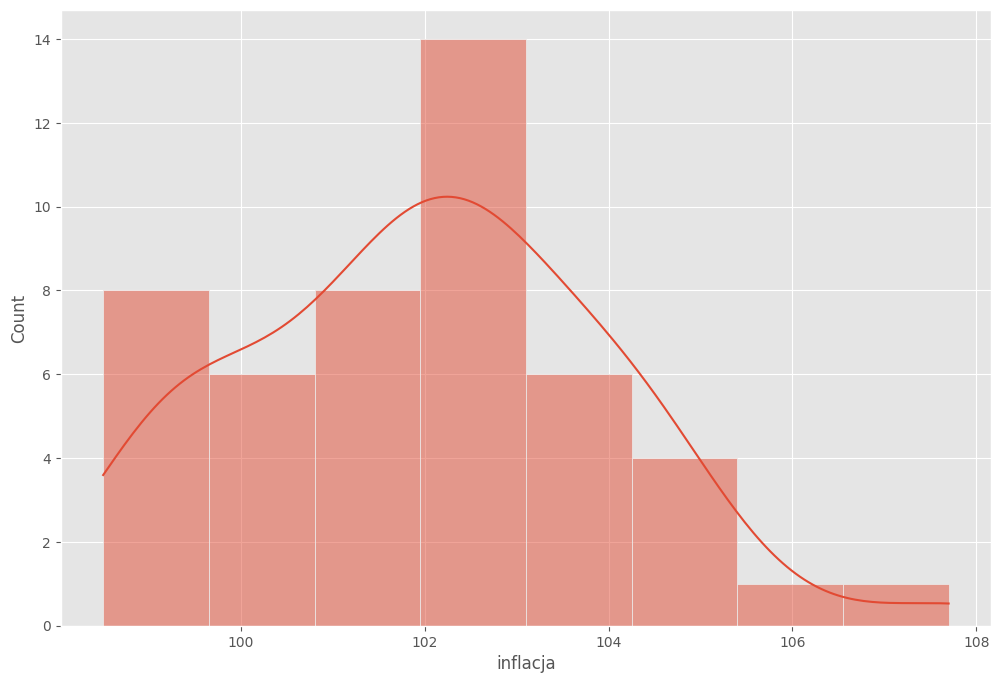

In [ ]:
ride_sharing = pd.read_csv("Gliwice1.csv") 
# Preview the first 5 lines of the loaded data 
ride_sharing.head()
df_numeric = ride_sharing.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['inflacja'], bins=8, kde=True)

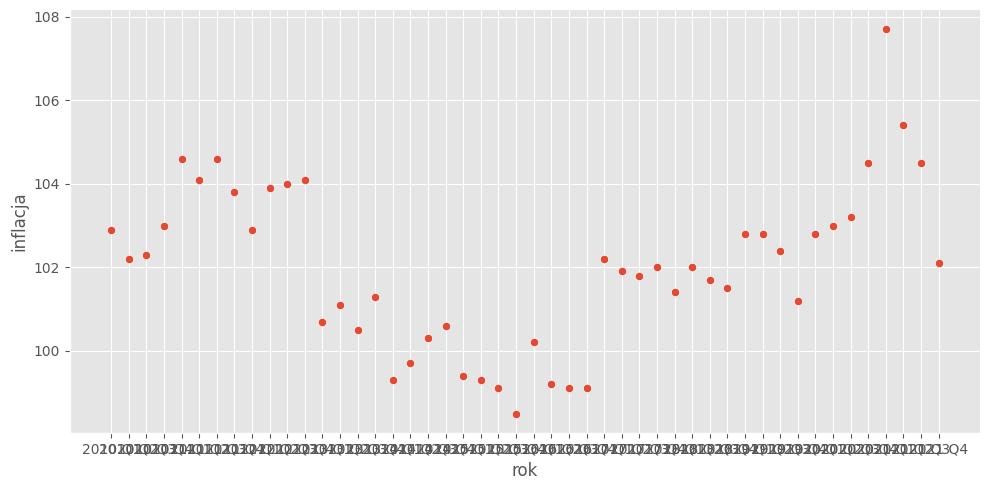

In [ ]:
sns.relplot(x = 'rok', y='inflacja', data=ride_sharing, aspect=2.0)

<Axes: xlabel='liczba sprzedanych lokali', ylabel='Count'>

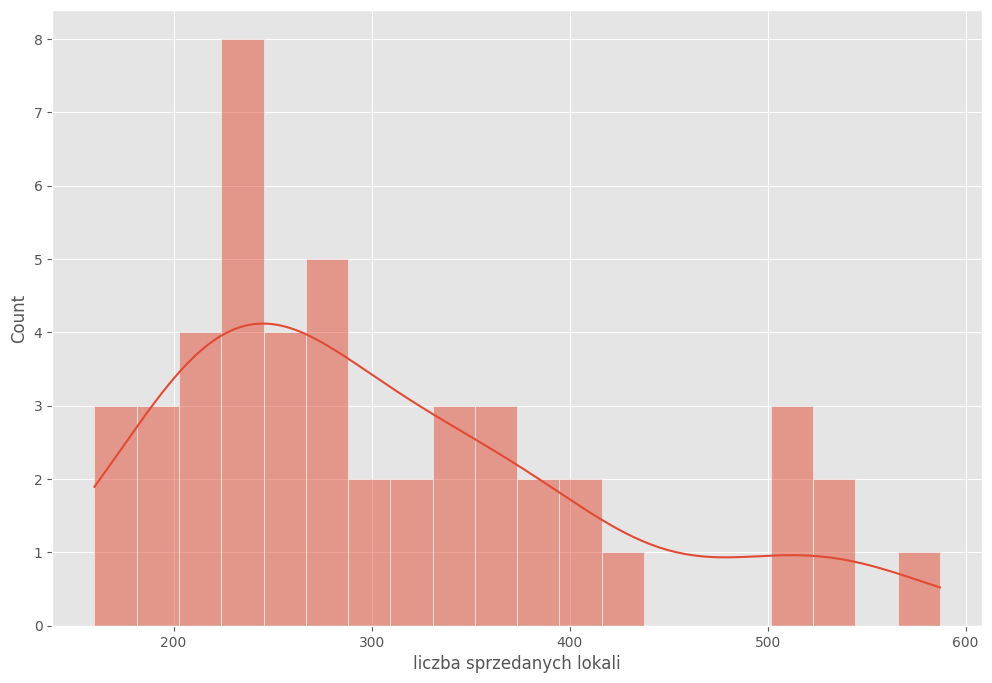

In [ ]:
df_numeric = ride_sharing.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['liczba sprzedanych lokali'], bins=20, kde=True)

In [ ]:
price_data["nastepny_kwartal"] = price_data["adj_cena"].shift(-2)

In [ ]:
price_data

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,nastepny_kwartal
rok,,,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,189539.589443
2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,201627.184466
2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,182342.256214
2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,181420.749280
2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,178432.122371
2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,196793.834297
2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,194446.064140
2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,169579.403272
2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,158609.615385


In [ ]:
price_data.dropna(inplace=True)

In [ ]:
price_data

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,nastepny_kwartal
rok,,,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,189539.589443
2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,201627.184466
2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,182342.256214
2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,181420.749280
2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,178432.122371
2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,196793.834297
2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,194446.064140
2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,169579.403272
2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,158609.615385


In [ ]:
price_data["change"] = (price_data["nastepny_kwartal"] > price_data["adj_cena"]).astype(int)

In [ ]:
price_data

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,nastepny_kwartal,change
rok,,,,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,189539.589443,1
2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,201627.184466,1
2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,182342.256214,0
2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,181420.749280,0
2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,178432.122371,0
2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,196793.834297,1
2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,194446.064140,1
2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,169579.403272,0
2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,158609.615385,0


In [ ]:
price_data["change"].value_counts()

1    32
0    14
Name: change, dtype: int64

In [ ]:
predictors = [ 'pkb', 'liczba studentow na 10tys','liczba sprzedanych lokali',
       'srednie zarobki w wojewodztwie', 'adj_cena']
target = "change"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 22 #take 5 y and 2 q of data
STEP = 4 #predict for 4q 1 year

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [ ]:
preds, accuracy = backtest(price_data, predictors, target)

In [ ]:
preds

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
accuracy

0.5833333333333334

In [ ]:
yearly = price_data.rolling(4, min_periods=1).mean()

In [ ]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [ ]:
price_data

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,nastepny_kwartal,change,pkb_year,liczba studentow na 10tys_year,liczba sprzedanych lokali_year,srednie zarobki w wojewodztwie_year,adj_cena_year
rok,,,,,,,,,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,189539.589443,1,1.000000,1.000000,1.000000,1.000000,1.000000
2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,201627.184466,1,1.028407,1.000000,1.080092,0.971532,1.004723
2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,182342.256214,0,1.032841,1.000000,1.025602,0.995573,1.012311
2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,181420.749280,0,1.123745,1.000000,0.922364,1.077069,1.056565
2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,178432.122371,0,0.973658,0.955224,0.778589,1.035027,0.959103
2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,196793.834297,1,1.007111,0.969697,1.077307,0.994841,0.961259
2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,194446.064140,1,1.011795,0.984615,1.146402,0.993033,0.959542
2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,169579.403272,0,1.127404,1.000000,1.112961,1.055464,1.065206
2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,158609.615385,0,0.953936,0.950276,0.868966,1.029923,1.035537


In [ ]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [ ]:
accuracy

0.5833333333333334

In [ ]:
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '2015 Q3'),
  Text(1, 0, '2015 Q4'),
  Text(2, 0, '2016 Q1'),
  Text(3, 0, '2016 Q2'),
  Text(4, 0, '2016 Q3'),
  Text(5, 0, '2016 Q4'),
  Text(6, 0, '2017 Q1'),
  Text(7, 0, '2017 Q2'),
  Text(8, 0, '2017 Q3'),
  Text(9, 0, '2017 Q4'),
  Text(10, 0, '2018 Q1'),
  Text(11, 0, '2018 Q2'),
  Text(12, 0, '2018 Q3'),
  Text(13, 0, '2018 Q4'),
  Text(14, 0, '2019 Q1'),
  Text(15, 0, '2019 Q2'),
  Text(16, 0, '2019 Q3'),
  Text(17, 0, '2019 Q4'),
  Text(18, 0, '2020 Q1'),
  Text(19, 0, '2020 Q2'),
  Text(20, 0, '2020 Q3'),
  Text(21, 0, '2020 Q4'),
  Text(22, 0, '2021 Q1'),
  Text(23, 0, '2021 Q2')])

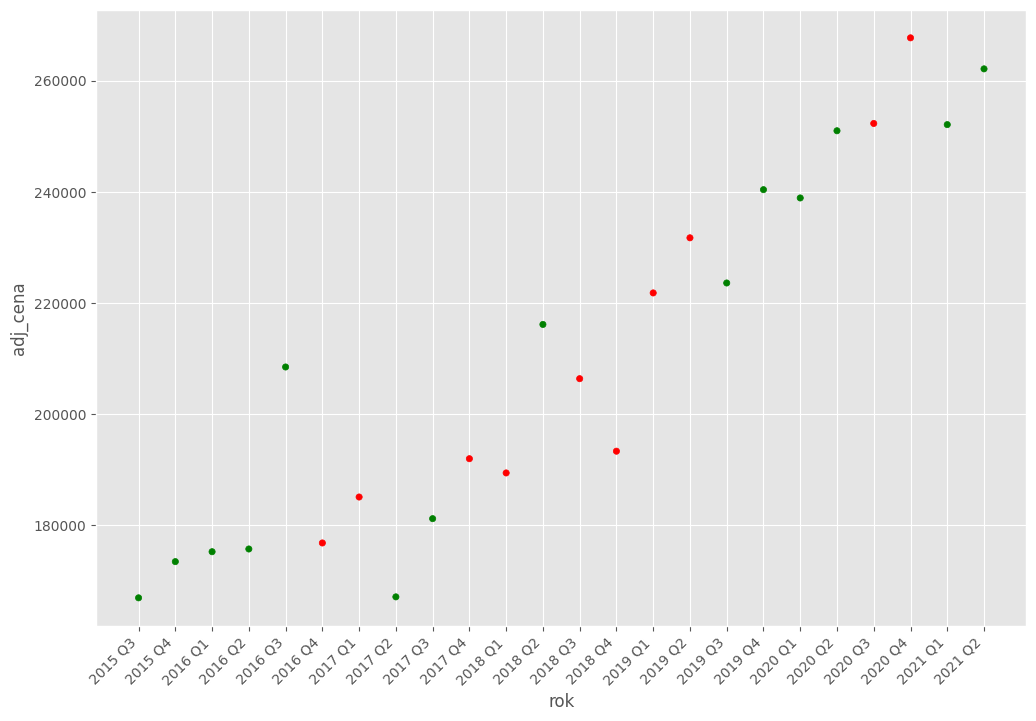

In [ ]:
import matplotlib.pyplot as plt
plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="rok", y="adj_cena", color=pred_match)
plt.xticks(rotation=45, ha='right') 


In [ ]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=4, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=5, random_state=1)

In [ ]:
result["importances_mean"]

array([0.11304348, 0.0173913 , 0.05217391, 0.0826087 , 0.36956522])

In [ ]:
predictors

['pkb',
 'liczba studentow na 10tys',
 'liczba sprzedanych lokali',
 'srednie zarobki w wojewodztwie',
 'adj_cena']

In [ ]:
data_list = price_data['change'].tolist()
y_true = np.array(data_list)
y_true = y_true[-len(preds):]

In [ ]:
importances = result["importances_mean"]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_true, preds)
mse = mean_squared_error(y_true, preds)
rmse = mean_squared_error(y_true, preds, squared=False)
r2 = r2_score(y_true, preds)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.42
Mean Squared Error: 0.42
Root Mean Squared Error: 0.65
R-squared: -1.22


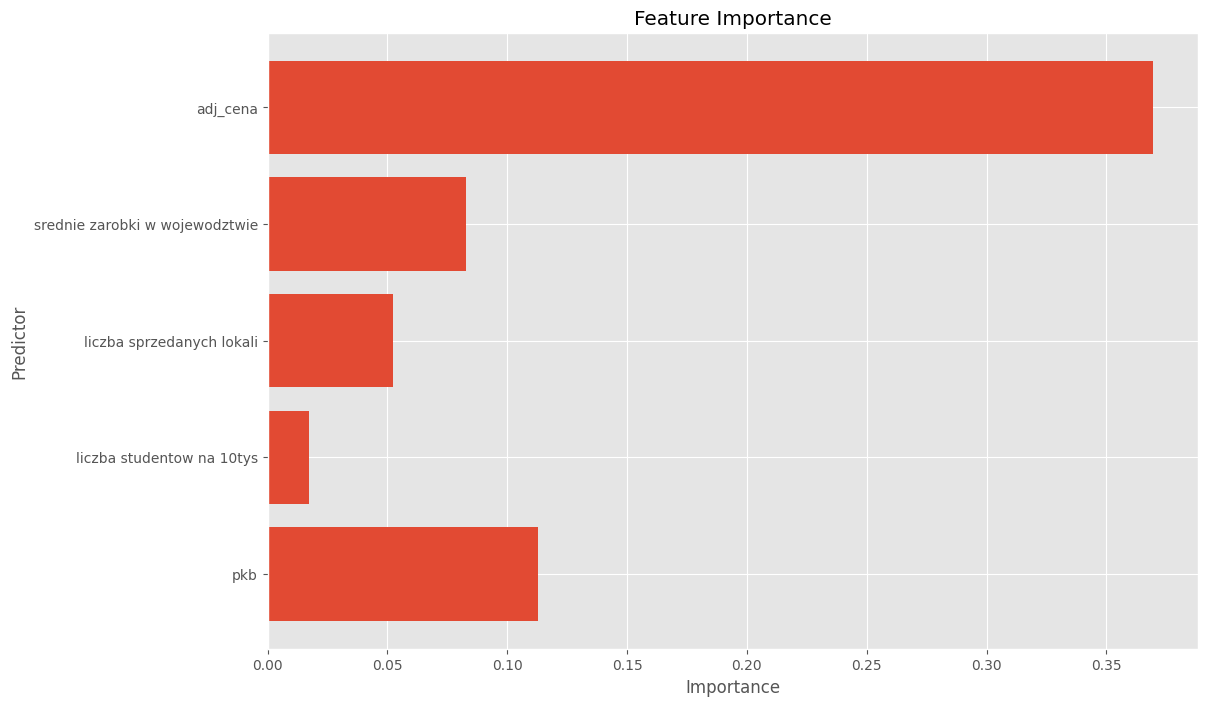

In [ ]:
#predictors = np.array(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
plt.barh(predictors, importances)

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Predictor')
plt.title('Feature Importance')

# Show the plot
plt.show()

In [ ]:
price_data

,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,nastepny_kwartal,change,pkb_year,liczba studentow na 10tys_year,liczba sprzedanych lokali_year,srednie zarobki w wojewodztwie_year,adj_cena_year
rok,,,,,,,,,,,,,,
2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,189539.589443,1,1.000000,1.000000,1.000000,1.000000,1.000000
2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,201627.184466,1,1.028407,1.000000,1.080092,0.971532,1.004723
2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,182342.256214,0,1.032841,1.000000,1.025602,0.995573,1.012311
2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,181420.749280,0,1.123745,1.000000,0.922364,1.077069,1.056565
2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,178432.122371,0,0.973658,0.955224,0.778589,1.035027,0.959103
2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,196793.834297,1,1.007111,0.969697,1.077307,0.994841,0.961259
2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,194446.064140,1,1.011795,0.984615,1.146402,0.993033,0.959542
2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,169579.403272,0,1.127404,1.000000,1.112961,1.055464,1.065206
2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,158609.615385,0,0.953936,0.950276,0.868966,1.029923,1.035537


In [ ]:
y_true

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1])